# A sentiment Analysis EDA 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## 1-Descriptive Statistics:

In [2]:
df = pd.read_csv('../data/raw_analyst_ratings.csv')
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [3]:
df.shape

(1407328, 6)

descriptive statistics for headline

In [4]:
df["headline_length"]=df["headline"].apply(len)
df.head()


,Unnamed: 0,headline,url,publisher,date,stock,headline_length
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,29
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,44
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,87


lets describe the headline

In [5]:
headline_stats = df['headline_length'].describe()
headline_stats

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64

#### from this the data have maximum of 512 and minimum of 3 characters of headline the data have 

### i need to remove rows which have less headline length

In [6]:
df['headline_length'].unique()

array([ 39,  42,  29,  44,  87,  71,  73, 120,  84,  47,  49,  94,  35,
        78,  81,  88,  68, 180, 210,  72,  60,  38, 254, 212, 138, 187,
       143, 166,  83,  98,  79, 209, 251,  40, 206, 255, 152,  57,  75,
        85, 106,  74,  82, 114, 100,  41,  55,  59, 107,  91, 103,  56,
       295, 243, 304,  70,  86,  32,  46, 178, 183, 154, 174, 101,  53,
        58,  54,  50, 240,  77, 169,  34,  48, 185, 184,  95, 175, 125,
        43,  90, 150, 113, 122,  45, 126,  89,  92, 195,  99, 132, 108,
       153,  66, 199, 164,  76, 134, 173, 115, 176, 192,  61, 147,  80,
        37, 165,  65,  12, 130, 112,  25,  33, 157,  27,  51, 167,  67,
        62,  28,  30,  24, 105, 162,  23,  63,  64,  52,  69,  97, 141,
       146,  21, 110,  96, 104, 116,  26, 124, 128, 163, 131,  36, 109,
        18, 136, 127, 118, 139, 148,  22,  20,  13,  31,  19,  17,  93,
       170, 111, 137, 155, 144, 190, 102, 181, 123, 129, 160, 135, 145,
       117, 140, 149, 207, 189, 323, 241, 196, 256, 205, 242, 23

In [7]:
df[df['headline_length'] < 10].count()

Unnamed: 0         59
headline           59
url                59
publisher          59
date               59
stock              59
headline_length    59
dtype: int64

#### so i will drop all of this data which the headline_length is less than 10

In [8]:
df1 = df[df['headline_length'] > 10]
df1.shape

(1407257, 7)

In [9]:
df1.head()

,Unnamed: 0,headline,url,publisher,date,stock,headline_length
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,29
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,44
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,87


### And now lets Count the number of articles per publisher to identify which publishers are most active.

In [10]:
publisher_counts = df1["publisher"].value_counts()
publisher_counts.head(8)

publisher
Paul Quintaro        228370
Lisa Levin           186979
Benzinga Newsdesk    150480
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49046
ETF Professor         28489
Name: count, dtype: int64

#### lets see the visual representaion

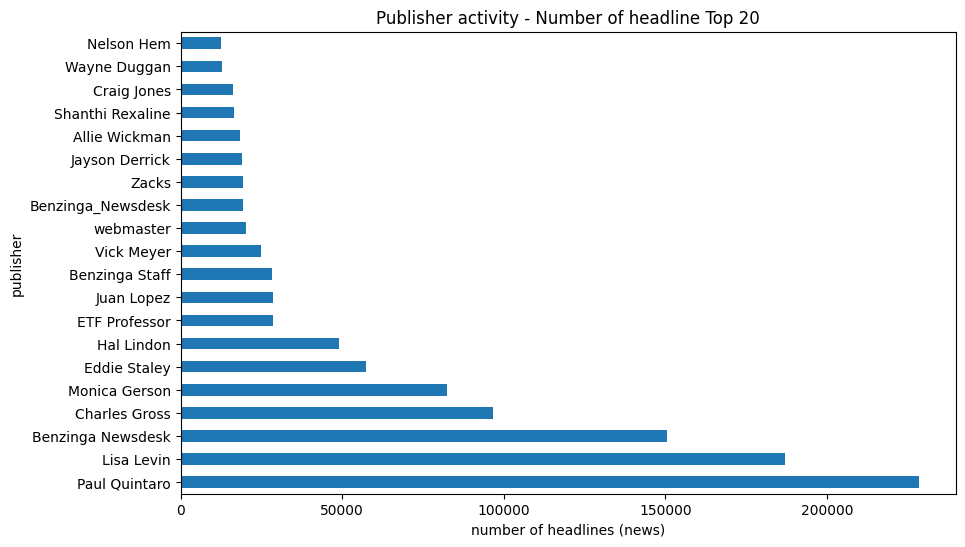

In [11]:
publisher_activity = df1.groupby("publisher")["headline"].count()
top_publishers = publisher_activity.sort_values(ascending=False).head(20)

plt.figure(figsize=(10,6))
top_publishers.plot(kind='barh', title="Publisher activity - Number of headline Top 20")
plt.xlabel("number of headlines (news)")
plt.ylabel("publisher")
plt.show()

In [12]:
publisher_counts.describe()

count      1033.000000
mean       1362.301065
std       11507.336152
min           1.000000
25%           3.000000
50%          11.000000
75%          94.000000
max      228370.000000
Name: count, dtype: float64

#### Analyze the publication dates to see trends over time, such as increased news frequency on particular days or during specific events.
#### because there is some date data inconsistanci i use the infer_datetime_format=True while changing in to datatime format

In [13]:
df1.loc[:,"date"] = pd.to_datetime(df1["date"], format='mixed', utc=True)
df1.head()

,Unnamed: 0,headline,url,publisher,date,stock,headline_length
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,A,39
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20+00:00,A,42
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 08:30:07+00:00,A,29
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 16:45:06+00:00,A,44
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 15:38:59+00:00,A,87


In [14]:
data_stats = df1["date"].describe()
data_stats

C:\Users\bekib\AppData\Local\Temp\ipykernel_53064\4074952881.py:1: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`
  data_stats = df1["date"].describe()


count                       1407257
unique                        39952
top       2020-03-12 00:00:00+00:00
freq                           1766
Name: date, dtype: object

##### from this we have a the most recent pubication is 2020-06-11 21:12:35+00:00 and the earlist was 2009-02-14 00:00:00+00:00

#### now lets make the data time series which will be easy to anlyse trends over time

### time series analysis

In [15]:
df1.set_index("date" , inplace=True)
df1.head()

c:\Users\bekib\Desktop\10ACADAMY\WEEK-ONE\week-1\.week-1\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


,Unnamed: 0,headline,url,publisher,stock,headline_length
date,,,,,,
2020-06-05 14:30:54+00:00,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,A,39
2020-06-03 14:45:20+00:00,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,A,42
2020-05-26 08:30:07+00:00,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,A,29
2020-05-22 16:45:06+00:00,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,A,44
2020-05-22 15:38:59+00:00,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,A,87


##### Resampling the Data by Day 

<Axes: title={'center': 'Daily publication Frequency'}, xlabel='date'>

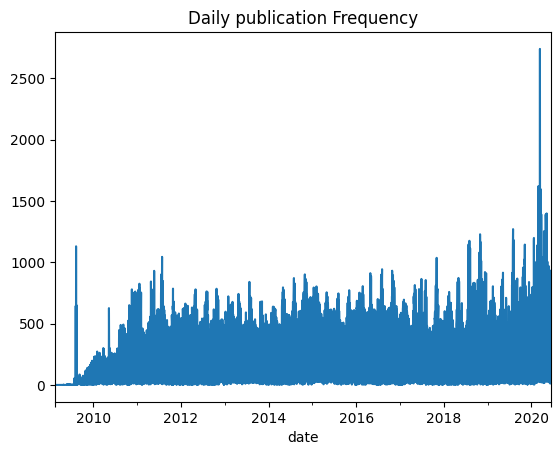

In [16]:
resample_data_by_day = df1['headline'].resample('D').count()
resample_data_by_day.plot(title="Daily publication Frequency")

### from this most of publications are held on the year between 2018 - 2020

#### but it can't let me get or see any trend and pattern so i have to do for weeks months and years then i will choose a significant year and do for the specfic years 

<Axes: title={'center': 'weekly publication frequency'}, xlabel='date'>

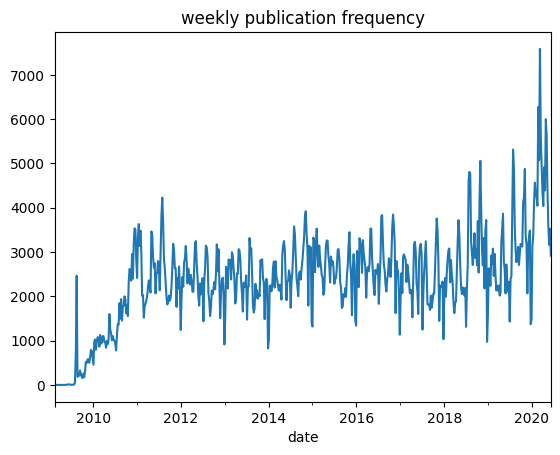

In [17]:
resamble_data_by_week = df1['headline'].resample('W').count()
resamble_data_by_week.plot(title="weekly publication frequency")

#### still can't see the trends so lets do for the year

In [18]:
resamble_data_by_year = df1['headline'].resample('YE').count()
resamble_data_by_year.sort_values(ascending=False)


date
2019-12-31 00:00:00+00:00    150376
2018-12-31 00:00:00+00:00    146924
2016-12-31 00:00:00+00:00    141891
2015-12-31 00:00:00+00:00    135294
2014-12-31 00:00:00+00:00    134858
2011-12-31 00:00:00+00:00    131296
2017-12-31 00:00:00+00:00    124455
2012-12-31 00:00:00+00:00    122636
2013-12-31 00:00:00+00:00    121529
2020-12-31 00:00:00+00:00    105214
2010-12-31 00:00:00+00:00     81306
2009-12-31 00:00:00+00:00     11478
Name: headline, dtype: int64

<Axes: title={'center': 'yearly publication frequency'}, xlabel='date'>

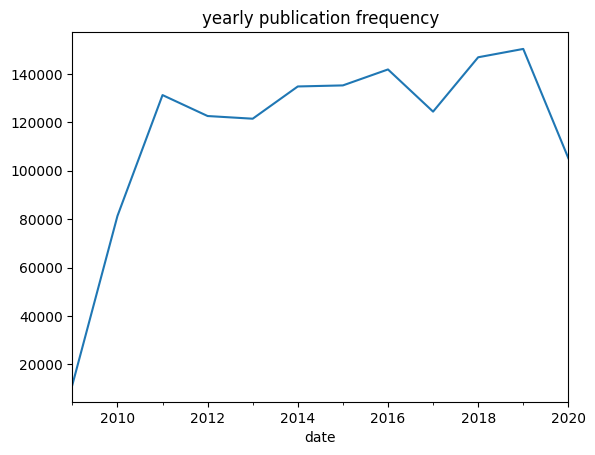

In [19]:
resamble_data_by_year.plot(title="yearly publication frequency")

#### i choose 5 best publication year and i will do the analysis on them

In [20]:
top_five_years = resamble_data_by_year.sort_values(ascending=False).head(5)
top_five_years

date
2019-12-31 00:00:00+00:00    150376
2018-12-31 00:00:00+00:00    146924
2016-12-31 00:00:00+00:00    141891
2015-12-31 00:00:00+00:00    135294
2014-12-31 00:00:00+00:00    134858
Name: headline, dtype: int64

<Axes: title={'center': 'Top five years of publication'}, xlabel='date'>

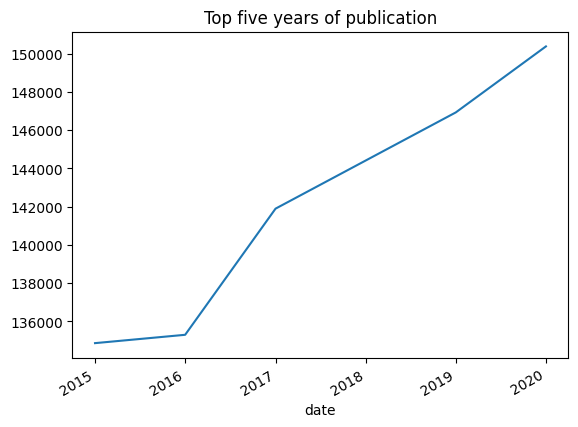

In [21]:
top_five_years.plot(title="Top five years of publication")

#### now i will find the best year

In [22]:
first_best = top_five_years.index[0]
first_best

Timestamp('2019-12-31 00:00:00+0000', tz='UTC')

In [23]:
data_top_year = df1[df1.index.year == first_best.year]
data_top_year.head()

,Unnamed: 0,headline,url,publisher,stock,headline_length
date,,,,,,
2019-12-27 00:00:00+00:00,70,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/19/12/15047352/s...,Lisa Levin,A,39
2019-12-23 00:00:00+00:00,71,Stocks That Hit 52-Week Highs On Monday,https://www.benzinga.com/news/19/12/15033664/s...,Lisa Levin,A,39
2019-12-20 00:00:00+00:00,72,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/19/12/15026655/s...,Lisa Levin,A,39
2019-12-12 00:00:00+00:00,73,Stocks That Hit 52-Week Highs On Thursday,https://www.benzinga.com/news/19/12/14980573/s...,Lisa Levin,A,41
2019-12-11 00:00:00+00:00,74,There's A New Trading Tool That Allows Traders...,https://www.benzinga.com/markets/cannabis/19/1...,Spencer Israel,A,78


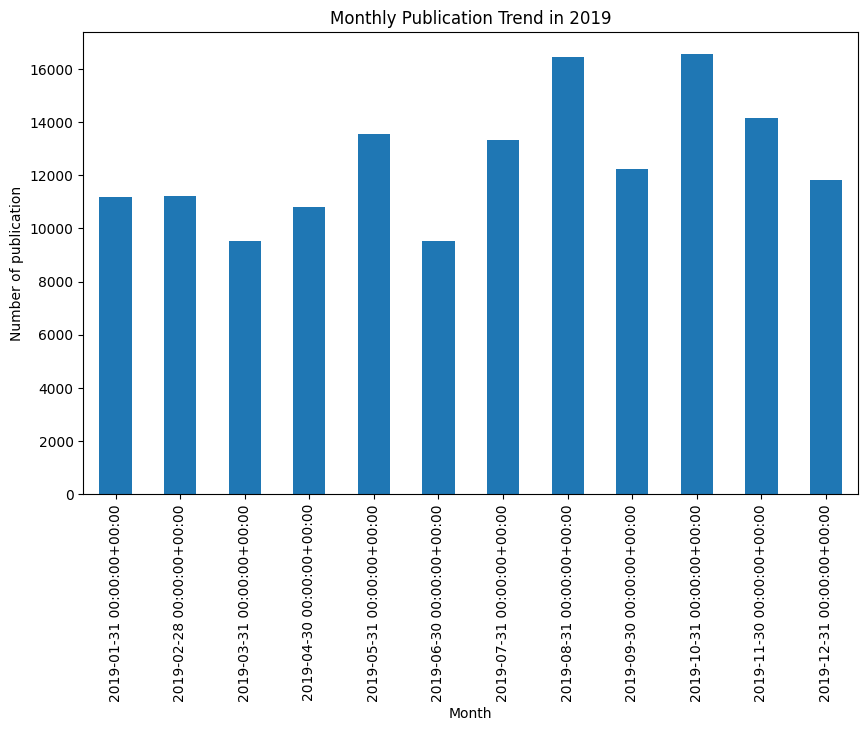

In [24]:
month_of_the_first_best_year = data_top_year['headline'].resample('ME').count()
month_of_the_first_best_year.plot(kind='bar' , title=f"Monthly Publication Trend in {first_best.year}" , figsize=(10,6))
plt.xlabel('Month')
plt.ylabel('Number of publication')
plt.show()

#### publication per day

In [25]:
resamble_data_by_day = df1['headline'].resample("D").count()
resamble_data_by_day.sort_values(ascending=False).head(10)

date
2020-03-12 00:00:00+00:00    2739
2020-02-28 00:00:00+00:00    1620
2020-03-19 00:00:00+00:00    1595
2020-02-27 00:00:00+00:00    1567
2020-03-06 00:00:00+00:00    1428
2020-05-07 00:00:00+00:00    1398
2020-03-23 00:00:00+00:00    1391
2020-04-29 00:00:00+00:00    1389
2020-03-11 00:00:00+00:00    1384
2020-04-30 00:00:00+00:00    1327
Name: headline, dtype: int64

#### to see the trend for each 5 best years lets do this 

In [26]:
first_best = top_five_years.index[0]
second_best = top_five_years.index[1]
third = top_five_years.index[2]
fourth = top_five_years.index[3]
fifth = top_five_years.index[4]


In [27]:
data_top_year = df1[df1.index.year == first_best.year]
data_top_year.head()

,Unnamed: 0,headline,url,publisher,stock,headline_length
date,,,,,,
2019-12-27 00:00:00+00:00,70,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/19/12/15047352/s...,Lisa Levin,A,39
2019-12-23 00:00:00+00:00,71,Stocks That Hit 52-Week Highs On Monday,https://www.benzinga.com/news/19/12/15033664/s...,Lisa Levin,A,39
2019-12-20 00:00:00+00:00,72,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/19/12/15026655/s...,Lisa Levin,A,39
2019-12-12 00:00:00+00:00,73,Stocks That Hit 52-Week Highs On Thursday,https://www.benzinga.com/news/19/12/14980573/s...,Lisa Levin,A,41
2019-12-11 00:00:00+00:00,74,There's A New Trading Tool That Allows Traders...,https://www.benzinga.com/markets/cannabis/19/1...,Spencer Israel,A,78


In [28]:
resamble_data_by_day = data_top_year['headline'].resample("D").count()
resamble_data_by_day.sort_values(ascending=False).head(10)

date
2019-08-01 00:00:00+00:00    1270
2019-08-07 00:00:00+00:00    1180
2019-07-31 00:00:00+00:00    1161
2019-11-07 00:00:00+00:00    1144
2019-07-30 00:00:00+00:00    1092
2019-08-05 00:00:00+00:00    1077
2019-11-05 00:00:00+00:00    1024
2019-08-08 00:00:00+00:00    1021
2019-11-04 00:00:00+00:00     997
2019-11-06 00:00:00+00:00     985
Name: headline, dtype: int64

#### August 2019:

The beginning of August was marked by the U.S.-China trade war escalating with new tariffs being announced. This was a key factor impacting global markets.
Additionally, two mass shootings occurred in the U.S. on August 3rd and 4th, which significantly impacted news cycles and could have had indirect effects on market sentiment.
On August 5th, there was a significant drop in U.S. stock markets due to trade tensions and fears of a currency war, as China allowed the yuan to weaken.
#### November 2019:

On November 5th, the U.S. began formally withdrawing from the Paris Climate Agreement, which had global economic and political ramifications.
November 7th saw a series of developments in the U.S.-China trade negotiations, leading to positive shifts in the stock market.

#### now the second best 

In [29]:
data_top_year2 = df1[df1.index.year == second_best.year]
resamble_data_by_day = data_top_year2['headline'].resample("D").count()
resamble_data_by_day.sort_values(ascending=False).head(10)

date
2018-10-30 00:00:00+00:00    1228
2018-08-02 00:00:00+00:00    1175
2018-11-01 00:00:00+00:00    1168
2018-07-26 00:00:00+00:00    1146
2018-10-29 00:00:00+00:00    1117
2018-08-08 00:00:00+00:00    1114
2018-08-01 00:00:00+00:00    1086
2018-10-24 00:00:00+00:00    1079
2018-08-07 00:00:00+00:00    1028
2018-10-23 00:00:00+00:00    1026
Name: headline, dtype: int64

#### The top publishing days for stock market news in late 2018 align with significant global events that impacted financial markets. For example:

October 29-30, 2018: The stock market saw heightened volatility as the U.S.-China trade war escalated, leading to concerns about global economic growth.
November 1, 2018: U.S. midterm elections were approaching, which introduced uncertainty into the markets.
August 2018: Markets reacted to the ongoing trade tensions, sanctions on Iran, and economic troubles in Turkey.
These events likely drove increased interest and reporting during those periods​(
FXEmpire
).

#### now the third best

In [30]:
data_top_year3 = df1[df1.index.year == third.year]
resamble_data_by_day = data_top_year3['headline'].resample("D").count()
resamble_data_by_day.sort_values(ascending=False).head(10)

date
2016-08-04 00:00:00+00:00    943
2016-10-27 00:00:00+00:00    931
2016-04-28 00:00:00+00:00    911
2016-08-03 00:00:00+00:00    903
2016-07-28 00:00:00+00:00    899
2016-11-02 00:00:00+00:00    894
2016-11-03 00:00:00+00:00    894
2016-05-04 00:00:00+00:00    888
2016-07-27 00:00:00+00:00    858
2016-07-26 00:00:00+00:00    855
Name: headline, dtype: int64

#### analyze the third best and find for trend or reason why this happen

#### now the fourth best

In [31]:
data_top_year4 = df1[df1.index.year == fourth.year]
resamble_data_by_day = data_top_year4['headline'].resample("D").count()
resamble_data_by_day.sort_values(ascending=False).head(10)

date
2015-02-04 00:00:00+00:00    803
2015-01-12 00:00:00+00:00    794
2015-02-03 00:00:00+00:00    775
2015-11-04 00:00:00+00:00    772
2015-11-03 00:00:00+00:00    760
2015-04-30 00:00:00+00:00    755
2015-11-05 00:00:00+00:00    750
2015-08-06 00:00:00+00:00    746
2015-02-17 00:00:00+00:00    743
2015-02-05 00:00:00+00:00    732
Name: headline, dtype: int64

#### significant market activities in 2015, driven by various global and domestic factors:

February 4, 2015: Stock markets experienced volatility due to concerns over global economic growth, particularly issues in the Eurozone and emerging markets.

November 3-5, 2015: These dates saw market movements influenced by the Federal Reserve's potential interest rate hikes, as well as corporate earnings reports.

August 6, 2015: Markets reacted to economic data from China, where a sharp slowdown raised fears of a global economic impact. China's devaluation of its currency during this period also contributed to market declines.

August 21, 2015: This was part of a turbulent period for global markets, with U.S. benchmarks plunging amid worries about China's economic health, leading to the worst performance in years for some indexes. The Dow Jones, S&P 500, and Nasdaq all experienced significant losses due to fears of a global slowdown and uncertainty around U.S. monetary policy​(
Nasdaq
,
Nasdaq
).

These dates correspond to key moments where macroeconomic concerns and central bank policies significantly impacted market sentiment.

#### now the fifth best

In [32]:
data_top_year5 = df1[df1.index.year == fifth.year]
resamble_data_by_day = data_top_year5['headline'].resample("D").count()
resamble_data_by_day.sort_values(ascending=False).head(10)

date
2014-10-30 00:00:00+00:00    901
2014-07-31 00:00:00+00:00    871
2014-11-05 00:00:00+00:00    865
2014-11-06 00:00:00+00:00    855
2014-11-12 00:00:00+00:00    838
2014-08-07 00:00:00+00:00    827
2014-10-29 00:00:00+00:00    824
2014-05-01 00:00:00+00:00    795
2014-11-04 00:00:00+00:00    791
2014-07-30 00:00:00+00:00    776
Name: headline, dtype: int64

#### For the dates you provided in 2014, several significant market events likely contributed to the high publishing volume of stock market news.

October 29-30, 2014: The Federal Reserve ended its quantitative easing program, which had been in place since the financial crisis. This was a significant move for the markets, impacting investor sentiment and leading to extensive coverage.

November 4-6, 2014: Midterm elections in the U.S. resulted in a Republican majority in Congress, influencing economic policies and market reactions.

July 30-31, 2014: Increased tensions between the U.S., EU, and Russia due to sanctions over the Ukraine crisis caused volatility in the markets​(
Nasdaq
).

These events are likely why these dates had a higher concentration of news articles.

In [33]:
df1.to_csv('../data/stockmarketnewscleaneddata.csv',index=False)

#### but we can analyze each of 5 years best publishing days and find for somthing trendy or factors

### The spikes in publication frequency around these dates are likely due to the global economic impact of the COVID-19 pandemic, leading to increased market volatility and investor uncertainty. These events prompted a surge in news coverage as people sought information on how the pandemic was affecting the economy and financial markets.

## 2- Text Analysis(Sentiment analysis & Topic Modeling)

### importing the package i built from scripts folder

### i will use two sentiment analysis libraries first one is NLTK

In [34]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [35]:
snl = SentimentIntensityAnalyzer()

#### we will use the processesd data which in our case df1

In [36]:
df2 = df1
df2.head()

,Unnamed: 0,headline,url,publisher,stock,headline_length
date,,,,,,
2020-06-05 14:30:54+00:00,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,A,39
2020-06-03 14:45:20+00:00,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,A,42
2020-05-26 08:30:07+00:00,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,A,29
2020-05-22 16:45:06+00:00,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,A,44
2020-05-22 15:38:59+00:00,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,A,87


#### let's preprocess the data for the sentiment use

In [37]:
df2['headline'] = df2['headline'].dropna().apply(lambda x: x.lower())
df2.head(5)

C:\Users\bekib\AppData\Local\Temp\ipykernel_53064\2638239270.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['headline'] = df2['headline'].dropna().apply(lambda x: x.lower())


,Unnamed: 0,headline,url,publisher,stock,headline_length
date,,,,,,
2020-06-05 14:30:54+00:00,0,stocks that hit 52-week highs on friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,A,39
2020-06-03 14:45:20+00:00,1,stocks that hit 52-week highs on wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,A,42
2020-05-26 08:30:07+00:00,2,71 biggest movers from friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,A,29
2020-05-22 16:45:06+00:00,3,46 stocks moving in friday's mid-day session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,A,44
2020-05-22 15:38:59+00:00,4,b of a securities maintains neutral on agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,A,87


#### let's analyze the sentiment

In [38]:
df2['nltk_sentiment'] = df2['headline'].apply(lambda x: snl.polarity_scores(x)['compound'])
df2.head()

C:\Users\bekib\AppData\Local\Temp\ipykernel_53064\2798067894.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['nltk_sentiment'] = df2['headline'].apply(lambda x: snl.polarity_scores(x)['compound'])


,Unnamed: 0,headline,url,publisher,stock,headline_length,nltk_sentiment
date,,,,,,,
2020-06-05 14:30:54+00:00,0,stocks that hit 52-week highs on friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,A,39,0.000
2020-06-03 14:45:20+00:00,1,stocks that hit 52-week highs on wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,A,42,0.000
2020-05-26 08:30:07+00:00,2,71 biggest movers from friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,A,29,0.000
2020-05-22 16:45:06+00:00,3,46 stocks moving in friday's mid-day session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,A,44,0.000
2020-05-22 15:38:59+00:00,4,b of a securities maintains neutral on agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,A,87,0.296


#### now we have the compaund sentiment so we need to catagorize it positive=1 negative=-1 and neutral=0 for ease of use 

In [39]:
df2['nltk_sentiment_label'] = df2['nltk_sentiment'].apply(
    lambda x : 1 if x > 0 else (-1 if x<0 else 0) )
df2.head()

C:\Users\bekib\AppData\Local\Temp\ipykernel_53064\471350680.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['nltk_sentiment_label'] = df2['nltk_sentiment'].apply(


,Unnamed: 0,headline,url,publisher,stock,headline_length,nltk_sentiment,nltk_sentiment_label
date,,,,,,,,
2020-06-05 14:30:54+00:00,0,stocks that hit 52-week highs on friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,A,39,0.000,0
2020-06-03 14:45:20+00:00,1,stocks that hit 52-week highs on wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,A,42,0.000,0
2020-05-26 08:30:07+00:00,2,71 biggest movers from friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,A,29,0.000,0
2020-05-22 16:45:06+00:00,3,46 stocks moving in friday's mid-day session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,A,44,0.000,0
2020-05-22 15:38:59+00:00,4,b of a securities maintains neutral on agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,A,87,0.296,1


### plot the vader result (NLTK)

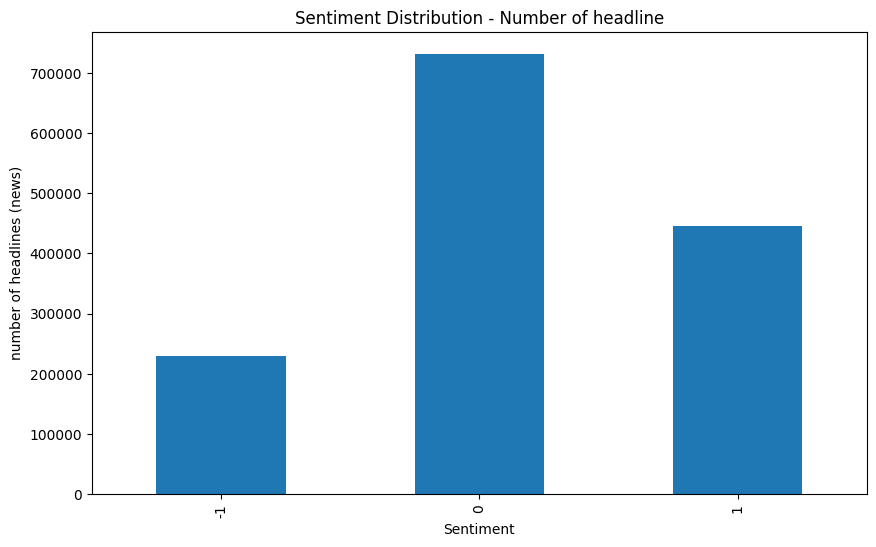

In [40]:
sentiment_ratio = df2.groupby("nltk_sentiment_label")["headline"].count()

plt.figure(figsize=(10,6))
sentiment_ratio.plot(kind='bar', title="Sentiment Distribution - Number of headline")
plt.xlabel("Sentiment")
plt.ylabel("number of headlines (news)")
plt.show()

### Using the default model of the hugging face sentiment analysis model

In [41]:
from transformers import pipeline

c:\Users\bekib\Desktop\10ACADAMY\WEEK-ONE\week-1\.week-1\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [43]:
# sent_pipeline = pipeline('sentiment-analysis')

## identifing common keywords or phrases

In [45]:
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.collocations import BigramCollocationFinder, TrigramCollocationFinder
from nltk.metrics import BigramAssocMeasures, TrigramAssocMeasures
import string

class Identifing_commen_words():
    def __init__(self, data):
        self.data = data
        # Download NLTK data files (only need to do this once)
        import nltk
        nltk.download('punkt')
        nltk.download('stopwords')
        self.stop_words = set(stopwords.words('english'))
        self.punctuation = string.punctuation
    
    def add_to_lsit(self):
        self.headline = self.data['headline'].dropna().tolist()
        return self.headline
    
    def text_cleaning_process(self, text):
        self.tokens = word_tokenize(text.lower())  # Convert to lowercase and tokenize
        self.tokens = [word for word in self.tokens if word.isalpha()]  # Remove punctuation
        self.tokens = [word for word in self.tokens if word not in self.stop_words]  # Remove stop words
        return self.tokens
    
    def clean_data(self, headline):
        self.cleand_headlines = [self.text_cleaning_process(head) for head in headline]
        return self.cleand_headlines
    
    def tokenize_and_frequency_distribution(self,cleand_headlines):
        self.all_words = [word for token in cleand_headlines for word in token]
        return self.all_words
    
    def the_most_frequnent(self,all_words):
        self.most_frequent = FreqDist(all_words)
        return self.most_frequent.most_common()
    
    def bigram_analysis(self, all_words,num ):
        self.bigram_finder = BigramCollocationFinder.from_words(all_words)
        self.bigrams = self.bigram_finder.nbest(BigramAssocMeasures.likelihood_ratio, num)
        return self.bigrams
    
    def trigram_analysis(self, all_words,num):
        self.trigram_finder = TrigramCollocationFinder.from_words(all_words)
        self.trigrams = self.trigram_finder.nbest(TrigramAssocMeasures.likelihood_ratio, num)
        return self.trigrams


### having this class we can do the key and common words identification

In [47]:
# lets initialize the data and create an instance of the class
identify = Identifing_commen_words(df2)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bekib\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bekib\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [48]:
headline = identify.add_to_lsit()
headline

['stocks that hit 52-week highs on friday',
 'stocks that hit 52-week highs on wednesday',
 '71 biggest movers from friday',
 "46 stocks moving in friday's mid-day session",
 'b of a securities maintains neutral on agilent technologies, raises price target to $88',
 'cfra maintains hold on agilent technologies, lowers price target to $85',
 'ubs maintains neutral on agilent technologies, raises price target to $87',
 'agilent technologies shares are trading higher after the company reported better-than-expected q2 eps and sales results.',
 'wells fargo maintains overweight on agilent technologies, raises price target to $95',
 '10 biggest price target changes for friday',
 "30 stocks moving in friday's pre-market session",
 'svb leerink maintains outperform on agilent technologies, raises price target to $95',
 "8 stocks moving in thursday's after-hours session",
 'agilent technologies shares are trading higher after the company reported better-than-expected q2 eps and sales results.',

In [49]:
cleand_headlines = identify.clean_data(headline)
cleand_headlines

[['stocks', 'hit', 'highs', 'friday'],
 ['stocks', 'hit', 'highs', 'wednesday'],
 ['biggest', 'movers', 'friday'],
 ['stocks', 'moving', 'friday', 'session'],
 ['b',
  'securities',
  'maintains',
  'neutral',
  'agilent',
  'technologies',
  'raises',
  'price',
  'target'],
 ['cfra',
  'maintains',
  'hold',
  'agilent',
  'technologies',
  'lowers',
  'price',
  'target'],
 ['ubs',
  'maintains',
  'neutral',
  'agilent',
  'technologies',
  'raises',
  'price',
  'target'],
 ['agilent',
  'technologies',
  'shares',
  'trading',
  'higher',
  'company',
  'reported',
  'eps',
  'sales',
  'results'],
 ['wells',
  'fargo',
  'maintains',
  'overweight',
  'agilent',
  'technologies',
  'raises',
  'price',
  'target'],
 ['biggest', 'price', 'target', 'changes', 'friday'],
 ['stocks', 'moving', 'friday', 'session'],
 ['svb',
  'leerink',
  'maintains',
  'outperform',
  'agilent',
  'technologies',
  'raises',
  'price',
  'target'],
 ['stocks', 'moving', 'thursday', 'session'],
 ['a

In [50]:
all_words = identify.tokenize_and_frequency_distribution(cleand_headlines)
all_words

['stocks',
 'hit',
 'highs',
 'friday',
 'stocks',
 'hit',
 'highs',
 'wednesday',
 'biggest',
 'movers',
 'friday',
 'stocks',
 'moving',
 'friday',
 'session',
 'b',
 'securities',
 'maintains',
 'neutral',
 'agilent',
 'technologies',
 'raises',
 'price',
 'target',
 'cfra',
 'maintains',
 'hold',
 'agilent',
 'technologies',
 'lowers',
 'price',
 'target',
 'ubs',
 'maintains',
 'neutral',
 'agilent',
 'technologies',
 'raises',
 'price',
 'target',
 'agilent',
 'technologies',
 'shares',
 'trading',
 'higher',
 'company',
 'reported',
 'eps',
 'sales',
 'results',
 'wells',
 'fargo',
 'maintains',
 'overweight',
 'agilent',
 'technologies',
 'raises',
 'price',
 'target',
 'biggest',
 'price',
 'target',
 'changes',
 'friday',
 'stocks',
 'moving',
 'friday',
 'session',
 'svb',
 'leerink',
 'maintains',
 'outperform',
 'agilent',
 'technologies',
 'raises',
 'price',
 'target',
 'stocks',
 'moving',
 'thursday',
 'session',
 'agilent',
 'technologies',
 'shares',
 'trading',
 'hi

In [51]:
common_words = identify.the_most_frequnent(all_words)
common_words

[('stocks', 161702),
 ('vs', 138835),
 ('eps', 128801),
 ('est', 122289),
 ('shares', 114140),
 ('reports', 108688),
 ('update', 91645),
 ('market', 91080),
 ('earnings', 87183),
 ('sales', 79528),
 ('top', 78492),
 ('benzinga', 74466),
 ('pt', 73059),
 ('announces', 66531),
 ('price', 64217),
 ('buy', 63928),
 ('downgrades', 61942),
 ('trading', 61146),
 ('raises', 57793),
 ('upgrades', 56802),
 ('target', 54669),
 ('maintains', 52960),
 ('higher', 48150),
 ('new', 47875),
 ('session', 45333),
 ('says', 43123),
 ('moving', 42248),
 ('stock', 39334),
 ('sees', 37971),
 ('estimate', 37938),
 ('energy', 35604),
 ('initiates', 34981),
 ('us', 34970),
 ('companies', 34390),
 ('neutral', 34352),
 ('lower', 34184),
 ('bank', 34058),
 ('lowers', 33855),
 ('scheduled', 32835),
 ('coverage', 32323),
 ('company', 31012),
 ('morgan', 30970),
 ('biggest', 30801),
 ('markets', 29783),
 ('capital', 29648),
 ('etfs', 29214),
 ('revenue', 28593),
 ('watch', 28378),
 ('yesterday', 28169),
 ('may', 2809

In [52]:
top_twenty_couple_words = identify.bigram_analysis(all_words,20)
top_twenty_couple_words

[('vs', 'est'),
 ('price', 'target'),
 ('benzinga', 'top'),
 ('eps', 'vs'),
 ('initiates', 'coverage'),
 ('reports', 'eps'),
 ('stocks', 'moving'),
 ('earnings', 'scheduled'),
 ('option', 'alert'),
 ('market', 'update'),
 ('shares', 'several'),
 ('companies', 'trading'),
 ('raises', 'pt'),
 ('morgan', 'stanley'),
 ('biggest', 'movers'),
 ('trading', 'higher'),
 ('analyst', 'blog'),
 ('set', 'new'),
 ('adj', 'eps'),
 ('trading', 'lower')]

In [53]:
top_twenty_triple_words = identify.trigram_analysis(all_words,20)
top_twenty_triple_words

[('eps', 'vs', 'est'),
 ('sales', 'vs', 'est'),
 ('revenue', 'vs', 'est'),
 ('vs', 'est', 'revenue'),
 ('vs', 'est', 'earnings'),
 ('vs', 'est', 'revenues'),
 ('revenues', 'vs', 'est'),
 ('vs', 'est', 'vs'),
 ('vs', 'est', 'rev'),
 ('reports', 'vs', 'est'),
 ('est', 'vs', 'est'),
 ('vs', 'est', 'last'),
 ('may', 'vs', 'est'),
 ('earnings', 'vs', 'est'),
 ('guidance', 'vs', 'est'),
 ('vs', 'est', 'sales'),
 ('vs', 'est', 'sees'),
 ('ffo', 'vs', 'est'),
 ('vs', 'est', 'year'),
 ('revs', 'vs', 'est')]

#### let's plot the words

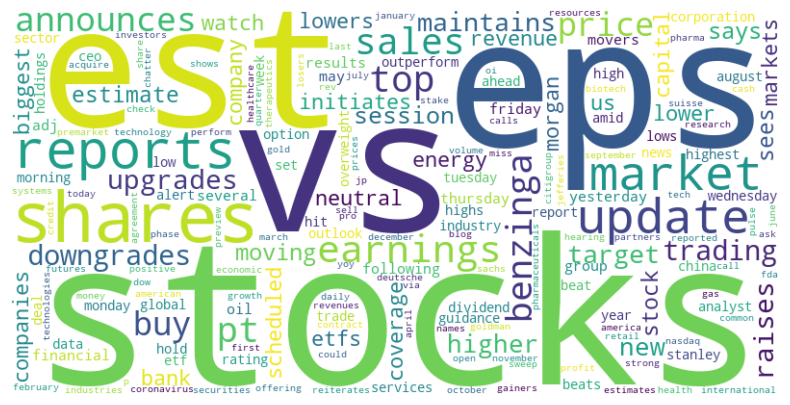

In [54]:
from wordcloud import WordCloud
# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(common_words))

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### bar chart visualization

# Time Series Analysis

In [ ]:
#  Decompose the Time Series:

In [62]:
from statsmodels.tsa.seasonal import seasonal_decompose


In [80]:
class Time_series_analysis:
    def __init__(self) -> None:
        pass
    def time_stamp_by_year(self,rank):
        # Resample data by year and count headlines
        self.resamble_data_by_year = df2['headline'].resample('YE').count()
        self.top_five_years = self.resamble_data_by_year.sort_values(ascending=False).head(5)
        self.first_best = self.top_five_years.index[rank]

        # Filter data for the selected year
        self.data_top_year = df2[df2.index.year == self.first_best.year]
        
        # Group by date (self.data_top_year.index) to count daily headlines
        self.daily_headlines = self.data_top_year.groupby(self.data_top_year.index).size()
        
        # Create a DataFrame for the time series
        self.time_series_data_of_headline_count = pd.DataFrame({'Headlines_Count': self.daily_headlines})
        return self.time_series_data_of_headline_count

    def plot_time_series(self,time_series_data_of_headline_count):

        decomposition = seasonal_decompose(time_series_data_of_headline_count['Headlines_Count'], model='additive', period=30)

        plt.figure(figsize=(14, 10))

        plt.subplot(411)
        plt.plot(time_series_data_of_headline_count['Headlines_Count'], label='Original', color='blue')
        plt.legend(loc='upper left')

        plt.subplot(412)
        plt.plot(decomposition.trend, label='Trend', color='orange')
        plt.legend(loc='upper left')

        plt.subplot(413)
        plt.plot(decomposition.seasonal, label='Seasonal', color='green')
        plt.legend(loc='upper left')

        plt.subplot(414)
        plt.plot(decomposition.resid, label='Residual/Irregular', color='red')
        plt.legend(loc='upper left')

    plt.tight_layout()
    plt.show()


<Figure size 640x480 with 0 Axes>

In [81]:
# daily_headlines = df2.groupby(df1.index).size()
# daily_headlines.describe()
# # let's createa a dataframe for the headline count only
# time_series_data_of_headline_count = pd.DataFrame({'Headlines_Count': daily_headlines})
# time_series_data_of_headline_count.head()
time_series_analysis = Time_series_analysis()

In [84]:
time_series_data_of_headline_count = time_series_analysis.time_stamp_by_year(0)
time_series_data_of_headline_count.head()

,Headlines_Count
date,
2019-01-01 00:00:00+00:00,7
2019-01-02 00:00:00+00:00,491
2019-01-02 09:48:54+00:00,1
2019-01-02 12:45:46+00:00,1
2019-01-02 14:12:16+00:00,1


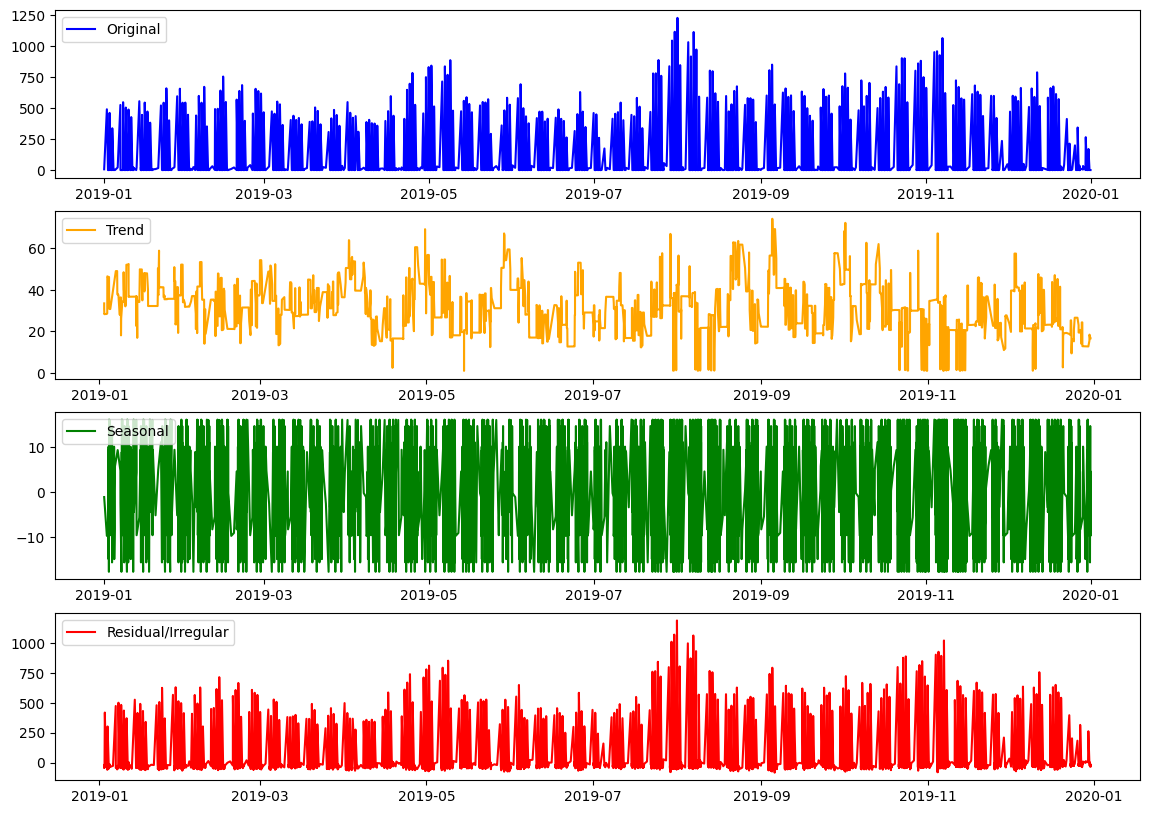

In [85]:
time_series_analysis.plot_time_series(time_series_data_of_headline_count)

## Publishing Times Analysis

In [97]:
class Publishing_time_series_Analysis:
    def __init__(self) -> None:
        pass
    def preprocess_for_hourly(self):
        df2['hour'] = df2.index.hour
        self.hourly_distribution = df2.groupby('hour').size()
        return self.hourly_distribution
    def preprocess_for_minuitly(self):
        df2['minute'] = df2.index.minute
        self.minutly_distribution = df2.groupby('minute').size()
        return self.minutly_distribution
    def plot_time_series(self,data_to_analyze):
        # Plot the distribution of news publishing times by hour

        plt.figure(figsize=(14, 8))  # Increase figure size for better visibility
        data_to_analyze.plot(kind='bar', color='skyblue')
        plt.title('Distribution of News Publishing Times by Hour')
        plt.xlabel('Minutes/Hours of the Day')
        plt.ylabel('Number of News Items')
        plt.xticks(rotation=45, fontsize=8)  # Rotate labels and increase font size
        plt.grid(True)
        plt.show()


In [98]:
publishing_time_series_analysis = Publishing_time_series_Analysis()

In [99]:
hourly_distribution = publishing_time_series_analysis.preprocess_for_hourly()
hourly_distribution

C:\Users\bekib\AppData\Local\Temp\ipykernel_53064\2459231032.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['hour'] = df2.index.hour


hour
0     1351401
1          82
2          48
3          27
4          67
5          14
6          57
7          93
8        1469
9        1829
10       2476
11       5033
12       5527
13       5965
14       7669
15       5701
16       5732
17       2710
18       2075
19       1612
20       3939
21       2800
22        704
23        227
dtype: int64

In [100]:
minutly_distribution = publishing_time_series_analysis.preprocess_for_minuitly()
minutly_distribution

C:\Users\bekib\AppData\Local\Temp\ipykernel_53064\2459231032.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['minute'] = df2.index.minute


minute
0     1352333
1        1270
2        1102
3        1134
4         951
5        1036
6        1078
7         927
8         859
9         844
10       1727
11        993
12        992
13        746
14        882
15       1045
16       1416
17        985
18        985
19       1076
20        829
21        846
22       1219
23       1020
24        740
25        952
26       1090
27        817
28        688
29        754
30       1184
31       1158
32       1165
33       1166
34       1176
35       1067
36        843
37        950
38        757
39        830
40        855
41       1090
42        744
43        784
44        829
45        930
46        765
47        846
48        776
49       1158
50        759
51        742
52        655
53        669
54        900
55        659
56        664
57        626
58        554
59        620
dtype: int64

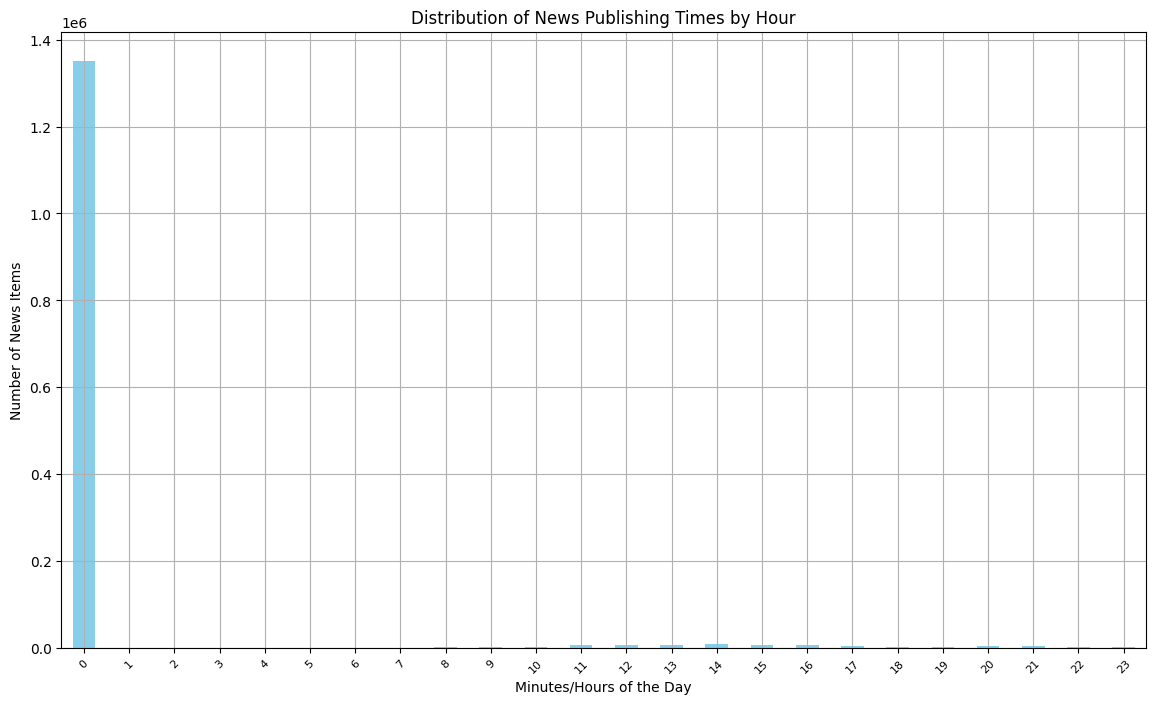

In [101]:
# let's plot both of it then
publishing_time_series_analysis.plot_time_series(hourly_distribution)

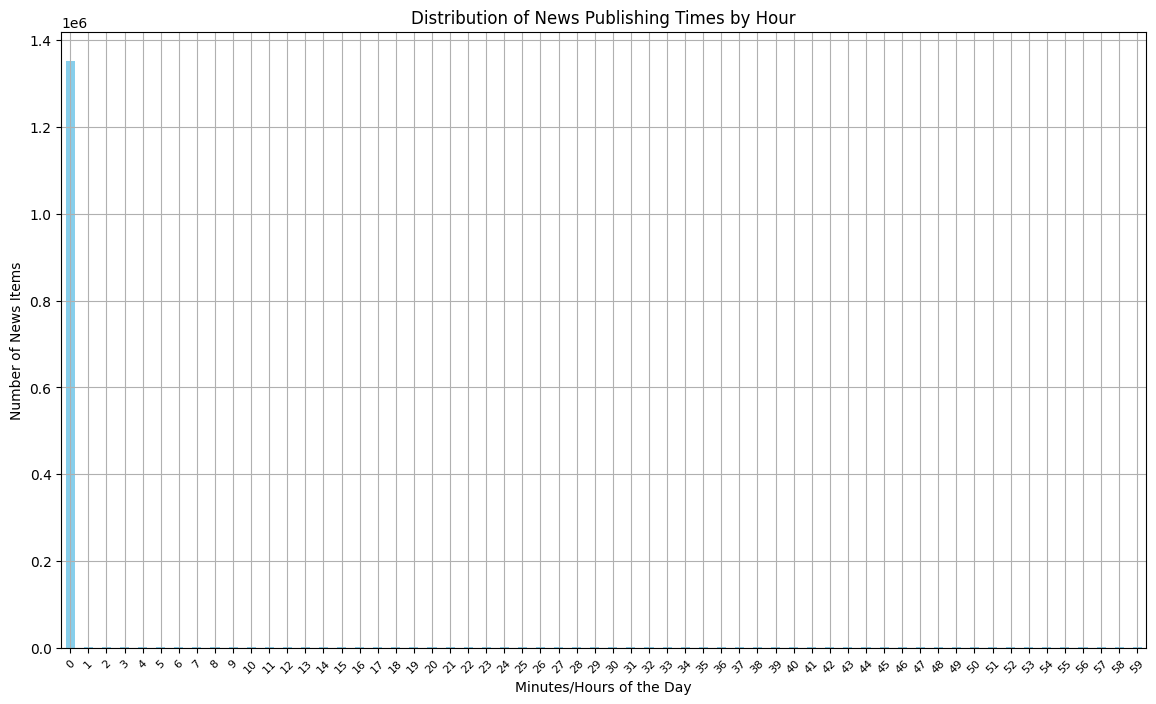

In [102]:
publishing_time_series_analysis.plot_time_series(minutly_distribution)

# Publication Analysis

In [164]:
class Publication_analysis:
    def __init__(self) -> None:
        pass
    def get_top_publihsers(self,top_what):
        # 1. Count the number of articles per publisher
        self.publisher_counts = df2['publisher'].value_counts()
        return self.publisher_counts.head(top_what)
    def analyze_the_sentiment_by_publisghers(self):
        # 2. Analyze the sentiment by publisher
        self.publisher_sentiment = df2.groupby('publisher')['nltk_sentiment'].mean()
        # Display the sentiment distribution for top publishers
        return self.publisher_sentiment
    def extract_domain(self,publisher):
        if '@' in publisher:
            return publisher.split('@')[-1]
        return publisher
    def extract_domains_from_email_addresses(self):
        try:
            self.df2['domain'] = df2['publisher'].apply(self.extract_domain)
            # Count the number of articles per domain
            self.domain_counts = df2['domain'].value_counts()
            return self.domain_counts
        except:
            return "no email address found"
    def plot_top_publishers(self,publisher_counts):
        # Top Publishers
        plt.figure(figsize=(10, 6))
        publisher_counts.head(10).plot(kind='bar', color='skyblue')
        plt.title('Top 10 Contributing Publishers')
        plt.xlabel('Publisher')
        plt.ylabel('Number of Articles')
        plt.xticks(rotation=45)
        plt.show()
    def plot_average_sentimetn_per_top_publishers(self, publisher_sentiment, publisher_counts):
        self.top_publishers = publisher_counts.index
        
        # Ensure that publisher_sentiment contains only the top publishers
        aligned_sentiment = publisher_sentiment.loc[self.top_publishers]
        
        # Plot
        plt.figure(figsize=(10, 6))
        aligned_sentiment.plot(kind='bar', color='orange')
        plt.title('Average Sentiment of Top 10 Publishers')
        plt.xlabel('Publisher')
        plt.ylabel('Average Sentiment Score')
        plt.xticks(rotation=45)
        plt.show()

    

In [165]:
publication_analysis = Publication_analysis()
top_publihsers=publication_analysis.get_top_publihsers(10)
top_publihsers

publisher
Paul Quintaro        228370
Lisa Levin           186979
Benzinga Newsdesk    150480
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49046
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28113
Name: count, dtype: int64

In [166]:
publisher_sentiment = publication_analysis.analyze_the_sentiment_by_publisghers()
publisher_sentiment

publisher
47ertrends                    0.000000
AARP                          0.018429
ABNNewswire                   0.038731
Aakin                         0.136000
Aaron Jackson.Ed              0.322244
                                ...   
vic@forextraininggroup.com    0.000000
vishwanath@benzinga.com      -0.052798
vivek.proactive@gmail.com    -0.047947
wallstreet1928               -0.020743
webmaster                     0.033818
Name: nltk_sentiment, Length: 1033, dtype: float64

In [167]:
publication_analysis.extract_domains_from_email_addresses()


'no email address found'

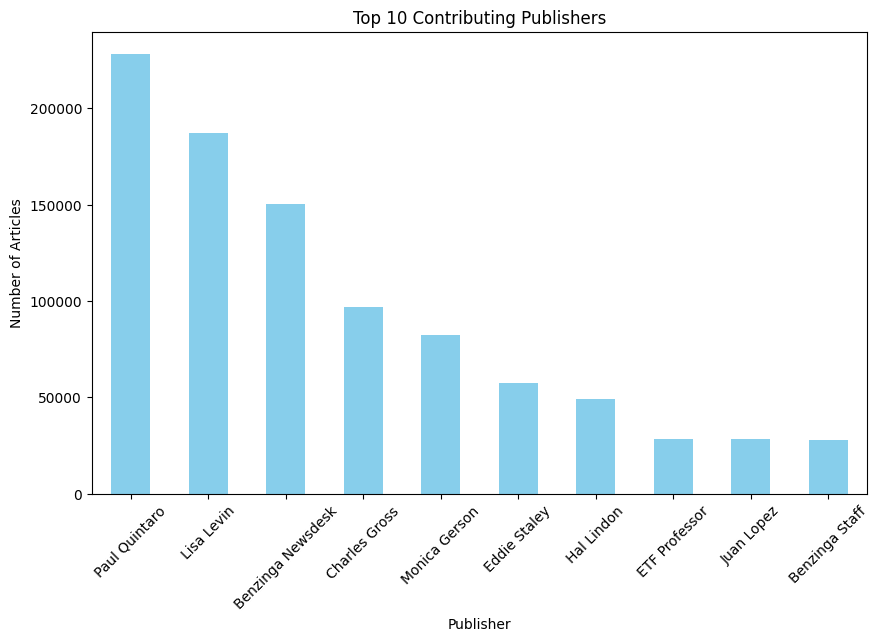

In [168]:
publication_analysis.plot_top_publishers(top_publihsers)

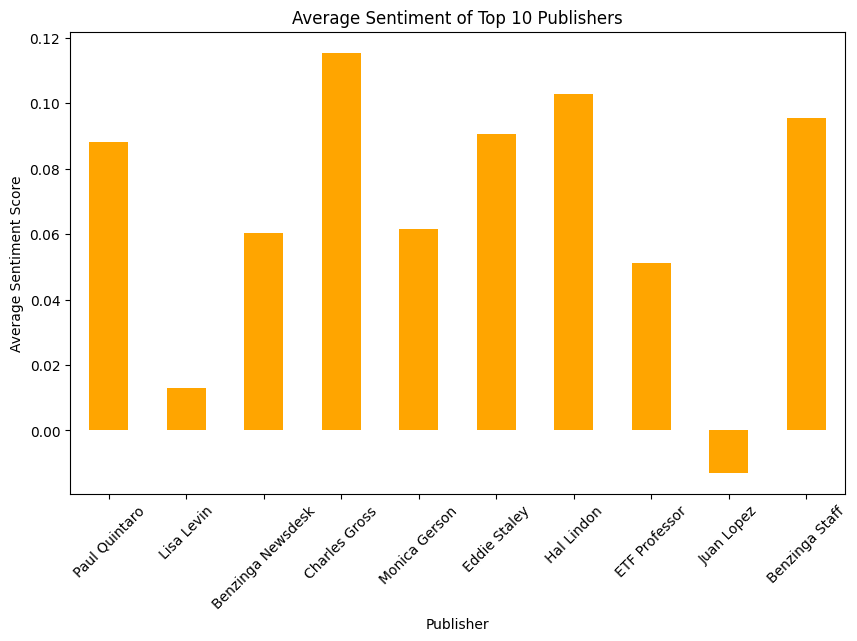

In [169]:
publication_analysis.plot_average_sentimetn_per_top_publishers(publisher_sentiment,top_publihsers)